In [1]:
import os
import itertools
import pandas as pd
import seaborn as sns
from matplotlib import cm
import scipy.stats as stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
BASE_DIR = os.getcwd()
file_path = '%s/../Data_EDA.csv'%BASE_DIR

In [3]:
df = pd.read_csv(file_path, encoding="latin-1")

In [4]:
pd.set_option('display.max_columns', None) #shows all fields within the dataframe

In [5]:
df.head()

,POP_CODE,DOC_DATE_YEAR,DOC_DATE_MONTH_YR,DOC_DATE_WEEK_YR,ORDER_STATUS,TOWN_CODE,TOWN_NAME,LOCALITY_CODE,LOCALITY_NAME,SLOCALITY_CODE,SLOCALITY_NAME,POP_NAME,POS_TYPE_CODE,POS_TYPE_NAME,DOC_DATE,MARKET_NAME,STREET_NAME,COMPANY_RANK,RANK,SHOPPER_TYPE_CODE,OWNER_NAME,RURAL_BOOL,SUB_ELEMENT_CODE,CHANNEL_CODE,SUB_CHANNEL_CODE,ELEMENT_CODE,MARKET_CODE,STREET_CODE,OWNER_CODE,RURAL_CODE,CHANNEL_NAME,SUB_CHANNEL_NAME,ELEMENT_NAME,SUB_ELEMENT_NAME,DOC_DATE_QUARTER_YR,DOC_DATE_DAYS_MNTH,DOC_DATE_WEEK_MNTH
0,1,2014,2,8,0,6,SOCIETY,3,BAHADURABAD,20,CHOTTI MARKET,ALAM MEDICAL STORE,8,Medical Store,2014-02-23,FIRST CHORANGI,K.E.S.C NATIONAL COLLEGE,3,5,2,M GHANI,Y,8,1,2,7,622,322,464,1,Retail,Grocery,Medical Store,Medical Store,1,28,4
1,1,2014,3,10,0,6,SOCIETY,3,BAHADURABAD,20,CHOTTI MARKET,ALAM MEDICAL STORE,8,Medical Store,2014-03-03,FIRST CHORANGI,K.E.S.C NATIONAL COLLEGE,3,5,2,M GHANI,Y,8,1,2,7,622,322,464,1,Retail,Grocery,Medical Store,Medical Store,1,31,1
2,1,2014,3,11,1,6,SOCIETY,3,BAHADURABAD,20,CHOTTI MARKET,ALAM MEDICAL STORE,8,Medical Store,2014-03-11,FIRST CHORANGI,K.E.S.C NATIONAL COLLEGE,3,5,2,M GHANI,Y,8,1,2,7,622,322,464,1,Retail,Grocery,Medical Store,Medical Store,1,31,2
3,1,2014,3,12,1,6,SOCIETY,3,BAHADURABAD,20,CHOTTI MARKET,ALAM MEDICAL STORE,8,Medical Store,2014-03-18,FIRST CHORANGI,K.E.S.C NATIONAL COLLEGE,3,5,2,M GHANI,Y,8,1,2,7,622,322,464,1,Retail,Grocery,Medical Store,Medical Store,1,31,3
4,1,2014,3,13,0,6,SOCIETY,3,BAHADURABAD,20,CHOTTI MARKET,ALAM MEDICAL STORE,8,Medical Store,2014-03-25,FIRST CHORANGI,K.E.S.C NATIONAL COLLEGE,3,5,2,M GHANI,Y,8,1,2,7,622,322,464,1,Retail,Grocery,Medical Store,Medical Store,1,31,4


In [6]:
df.shape

(120412, 37)

In [7]:
for field in df.columns:
    print("{0:20} {1:10} {2}".format(field, str(df[field].dtype), df[field].nunique()))

POP_CODE             int64      818
DOC_DATE_YEAR        int64      5
DOC_DATE_MONTH_YR    int64      12
DOC_DATE_WEEK_YR     int64      53
ORDER_STATUS         int64      2
TOWN_CODE            int64      5
TOWN_NAME            object     5
LOCALITY_CODE        int64      14
LOCALITY_NAME        object     14
SLOCALITY_CODE       int64      37
SLOCALITY_NAME       object     37
POP_NAME             object     696
POS_TYPE_CODE        int64      15
POS_TYPE_NAME        object     15
DOC_DATE             object     1279
MARKET_NAME          object     736
STREET_NAME          object     292
COMPANY_RANK         int64      3
RANK                 int64      5
SHOPPER_TYPE_CODE    int64      3
OWNER_NAME           object     423
RURAL_BOOL           object     2
SUB_ELEMENT_CODE     int64      15
CHANNEL_CODE         int64      3
SUB_CHANNEL_CODE     int64      7
ELEMENT_CODE         int64      12
MARKET_CODE          int64      736
STREET_CODE          int64      292
OWNER_CODE           

It's time to see the data visually. This will help us determine:
* Instances where more data cleaning is required
* Hidden patterns that exist within the data.

<span style="color:brown">We will start off our analysis by looking at a time series frequency distribution of our dataset. For that purpose dates will be converted into integer to plot a density plot</span>.

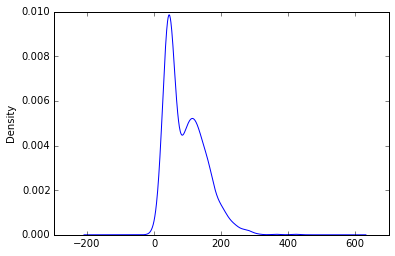

In [8]:
df['DOC_DATE'] = df['DOC_DATE'].astype('category')
df['DOC_CODE'] = df['DOC_DATE'].cat.codes

df["DOC_DATE"].value_counts().plot(kind="density")

The distribution seems to have two Gaussian distributions. The first one has a higher mode then the one following it. Also the tail towards the right hand size is greater than one towards the left hand side.

<span style="color:brown">Multivariate exploratory data analysis is only applicable if the data features are continuous i.e. Histogram, scatter plot. This is where the limitation came in i.e. all features within our dataset are discrete. Hence in order to cope up with this limitation, we assumed the features having many distinct values as continuous e.g. OWNER_CODE, POP_CODE. Therefore the plan is to compute scatter plots among features sharing this characteristic.<br><br>In a similar fashion we were caught up with this limitation while calculating correlation. We can use Kendall Tau to compute correlation among rank variables i.e. RANK and COMPANY_RANK. But what about the other features? Assuming those features we assumed to be continuous, to follow linear relationships among themselves, we can calculate Pearson correlations.<br><br>In order to check for homogeneity i.e. in case clusters exists, we have color coded points by means of their ORDER_STATUS value, i.e. Red represents 1, and Blur represents 0. The code below will compute scatter plots and correlations among all these features</span>

/home/thinkpad-marketiq/anaconda2/envs/_ids/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


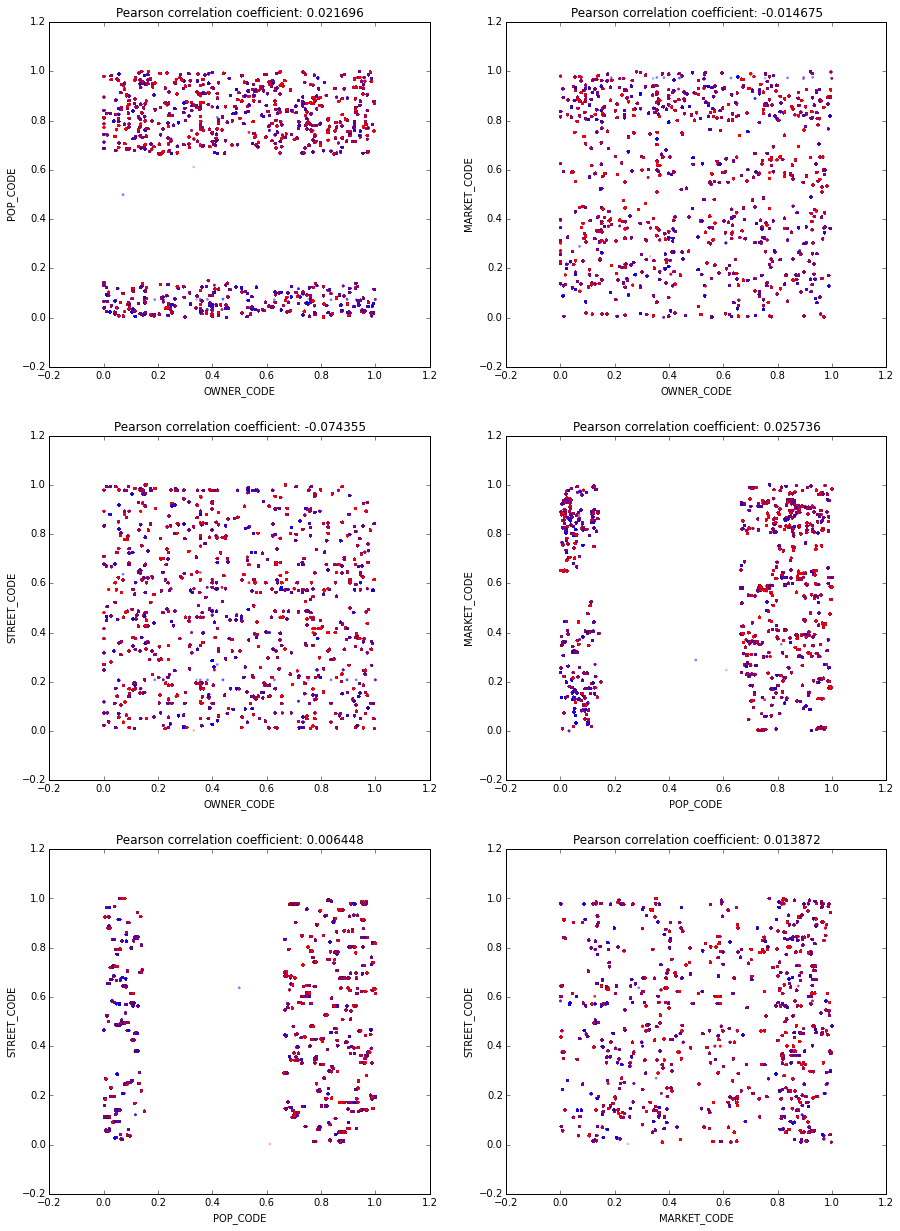

In [9]:
plt.figure(figsize=(15,21))
cont_features = ['OWNER_CODE', 'POP_CODE', 'MARKET_CODE', 'STREET_CODE']
colors = df['ORDER_STATUS'].apply(lambda x: 'r' if x==1 else 'b')

for index, pair in enumerate(list(itertools.combinations(cont_features, 2))):
    plt.subplot(3, 2, index + 1)
    x = df[pair[0]]/max(df[pair[0]])
    y = df[pair[1]]/max(df[pair[1]])

    plt.scatter(x, y, c = colors, alpha = 0.3, lw = 0, s = 7)
    plt.title('Pearson correlation coefficient: %f'%(df[pair[0]].corr(df[pair[1]])))
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    
plt.show()

No relationship seems to exist; nor can we see any homogeneity between POP_CODE and OWNER_CODE; POP_CODE and STREET_CODE; and POP_CODE and STREET_CODE. The same is evident from their correlation coefficients as well i.e. correlation value approaching 0.

No relationship seems to exist for the other scatter plots as well; however two clusters exist within the remaining plots. But the disappointing thing about these clusters is that they are not homogeneous.

<span style="color:brown">As we planned earlier, let's compute the Kendall Tau correlation between RANK and COMPANY_RANK</span>

In [16]:
stats.kendalltau(df['RANK'], df['COMPANY_RANK'])[0]

-0.035139499622101798

The correlation converges to 0 which means that no correlation exists between RANK and COMPANY_RANK.

<span style="color:brown">Bar charts are a good representation to understand the frequency of discrete features. Majority of the features within our dataset are discrete and thus we will plot them using a Bar graph. In order to understand the split of these categories between ORDER_STATUS type, a stacked bar plot will be plotted.</span>

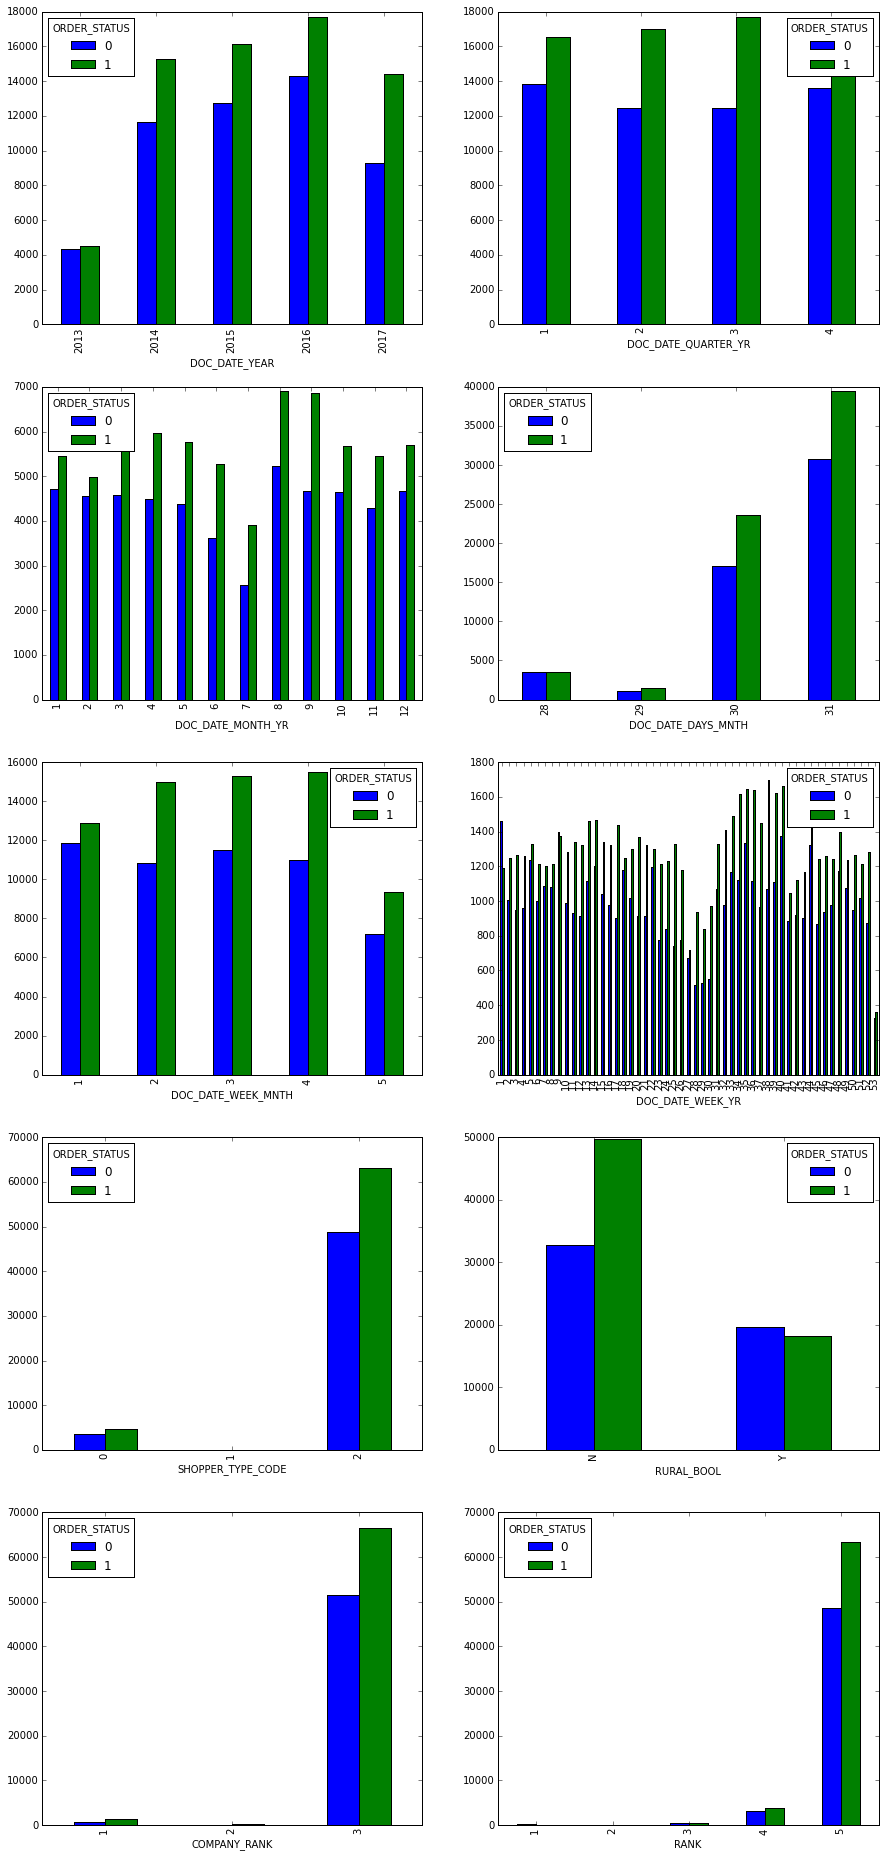

In [20]:
plt.figure(figsize=(15,32.5))

bar_features = ['DOC_DATE_YEAR', 'DOC_DATE_QUARTER_YR', 'DOC_DATE_MONTH_YR', 'DOC_DATE_DAYS_MNTH',
                'DOC_DATE_WEEK_MNTH', 'DOC_DATE_WEEK_YR', 'SHOPPER_TYPE_CODE', 'RURAL_BOOL',
                'COMPANY_RANK', 'RANK']

for index, field in enumerate(bar_features):
    plt.subplot(5, 2, index+1)
    df_unstack = df.groupby([field, 'ORDER_STATUS'])[field].count().unstack('ORDER_STATUS').fillna(0)
    df_unstack[[0, 1]].plot.bar(ax=plt.gca())

From the plots above it looks like we don't have much data for the year 2013 available. A reason for which can be that for 2013 we only have the data from August onwards i.e. 5 months. Most of the Shoppers belong from type 3. Majority of the stores in our dataset belong from Urban areas, out of which in 62.5% (i.e. 50,000/80,000) of the instances an order has been placed. Moreover RANK seems to follow an exponential pattern.

<span style="color:brown">Sum of the features within our dataset can be represented as part of a whole i.e. pie charts. Hence let's plot such features in form of a pie chart.</span>

In [10]:
df.columns

Index(['POP_CODE', 'DOC_DATE_YEAR', 'DOC_DATE_MONTH_YR', 'DOC_DATE_WEEK_YR',
       'ORDER_STATUS', 'TOWN_CODE', 'TOWN_NAME', 'LOCALITY_CODE',
       'LOCALITY_NAME', 'SLOCALITY_CODE', 'SLOCALITY_NAME', 'POP_NAME',
       'POS_TYPE_CODE', 'POS_TYPE_NAME', 'DOC_DATE', 'MARKET_NAME',
       'STREET_NAME', 'COMPANY_RANK', 'RANK', 'SHOPPER_TYPE_CODE',
       'OWNER_NAME', 'RURAL_BOOL', 'SUB_ELEMENT_CODE', 'CHANNEL_CODE',
       'SUB_CHANNEL_CODE', 'ELEMENT_CODE', 'MARKET_CODE', 'STREET_CODE',
       'OWNER_CODE', 'RURAL_CODE', 'CHANNEL_NAME', 'SUB_CHANNEL_NAME',
       'ELEMENT_NAME', 'SUB_ELEMENT_NAME', 'DOC_DATE_QUARTER_YR',
       'DOC_DATE_DAYS_MNTH', 'DOC_DATE_WEEK_MNTH', 'DOC_CODE'],
      dtype='object')

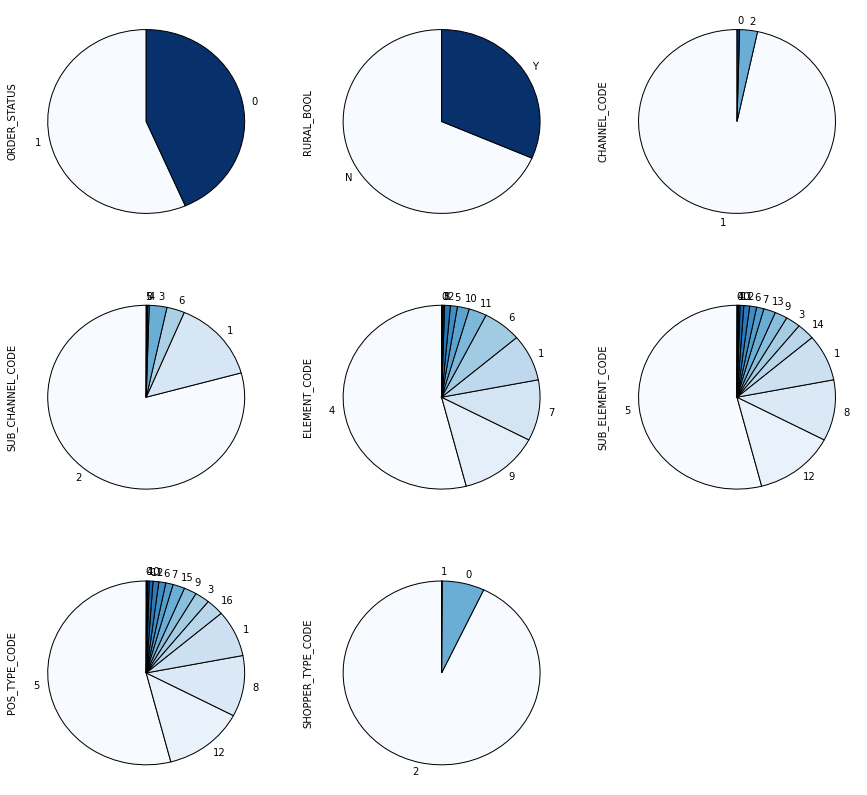

In [11]:
plt.figure(figsize=(15, 14))
cmap = cm.get_cmap('Blues')
pie_features = ['ORDER_STATUS', 'RURAL_BOOL', 'CHANNEL_CODE', 'SUB_CHANNEL_CODE',
                'ELEMENT_CODE', 'SUB_ELEMENT_CODE', 'POS_TYPE_CODE', 'SHOPPER_TYPE_CODE']

for index, field in enumerate(pie_features):
    plt.subplot(3, 3, index+1)
    df[field].value_counts().plot(kind='pie', startangle=90, ax=plt.gca(), colormap = cmap)

In [12]:
for f_id, f_name in {'CHANNEL_CODE': 'CHANNEL_NAME', 'SUB_CHANNEL_CODE': 'SUB_CHANNEL_NAME',
                     'ELEMENT_CODE': 'ELEMENT_NAME', 'SUB_ELEMENT_CODE': 'SUB_ELEMENT_NAME',
                     'POS_TYPE_CODE' : 'POS_TYPE_NAME'}.items():
    print("{0:20} {1}".format(f_name, df[df[f_id] == df[f_id].value_counts().index[0]][f_name].values[0]))

SUB_CHANNEL_NAME     Grocery
CHANNEL_NAME         Retail
ELEMENT_NAME         General Store
SUB_ELEMENT_NAME     General Store
POS_TYPE_NAME        General Store


Majority of the stores in our dataset are General stores which belong from the Retail channel; and have Grocery items within their inventory.

<span style="color:brown">Given that we can consider the discrete features with many unique occurances as continuous, let's plot a density curve for each of these.</span>

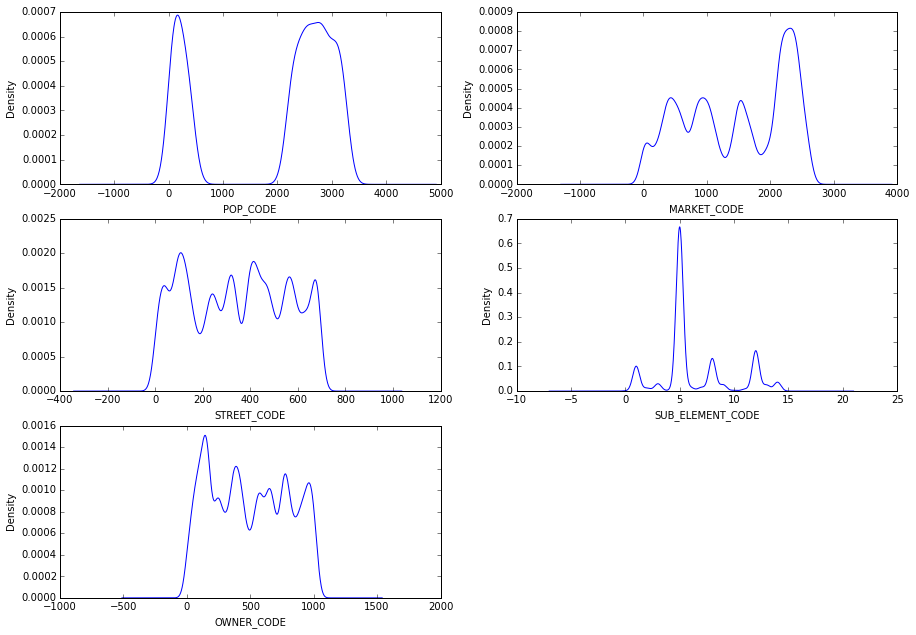

In [13]:
plt.figure(figsize=(15, 10.5))
density_features = ['POP_CODE', 'MARKET_CODE', 'STREET_CODE', 'SUB_ELEMENT_CODE', 'OWNER_CODE']

for index, field in enumerate(density_features):
    plt.subplot(3, 2, index+1)
    df[field].plot(kind='density', ax=plt.gca())
    plt.xlabel(field)

All of these density plots seem to be a mixture of Gaussian distributions. Out of these, ones with definite illustrations are those of POP_CODE and SUB_ELEMENT_CODE. POP_CODE has two definitive non-conflicting Gaussian distributions. Whereas in SUB_ELEMENT_CODE, there is one Gaussian distribution towards the center which is dominating in terms of Mode.